# Lec


|x|y|
|-|-|
|1|1|
|2|2|
|3|3|

이러한 데이터가 있을 때 단순화 시킨 cost 함수에 맞춰 계산한 W(가중치)에 따른 예측값은 다음과 같다.

W = 0, cost(W) = 4.67
$
\frac 1 3 ((0 \times 1 - 1)^2 + (0 \times 2 - 2)^2 + (0 \times 3 - 3)^2))
$

W = 1, cost(W) = 0
$
\frac 1 3 ((1 \times 1 - 1)^2 + (1 \times 2 - 2)^2 + (1 \times 3 - 3)^2))
$

W = 2, cost(W) = 4.67
$
\frac 1 3 ((2 \times 1 - 1)^2 + (2 \times 2 - 2)^2 + (2 \times 3 - 3)^2))
$

W = 3, cost(W) = 18.67
$
\frac 1 3 ((3 \times 1 - 1)^2 + (3 \times 2 - 2)^2 + (3 \times 3 - 3)^2))
$

이 cost를 W를 가로축으로 해서 나타내면 다음과 같다.

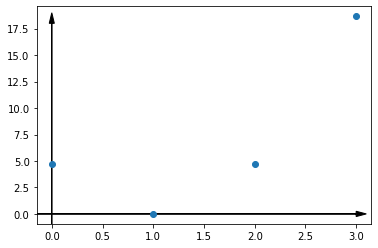

In [1]:
import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3], [4.67, 0, 4.67, 18.67], 'o')
plt.arrow(0, -10, 0, 28, head_width=0.05, head_length=1, fc='k')
plt.arrow(-10, 0, 13, 0, head_width=0.5, head_length=.1, fc='k')

Text(0, 0.5, 'cost')

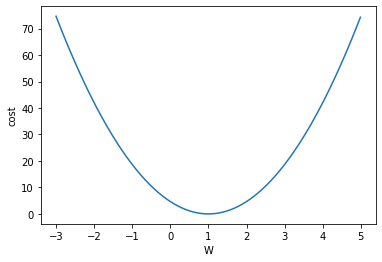

In [2]:
import numpy as np

x_data = np.array([1, 2, 3])
y_data = np.array([1, 2, 3])
xs = []
ys = []
for W in np.arange(-3, 5, 0.01):
    xs.append(W)
    ys.append(np.mean(np.square(W * x_data - y_data)))
plt.plot(xs, ys)
plt.xlabel("W")
plt.ylabel("cost")

cost가 가장 작은 점을 찾아야한다.

눈으로는 쉽게 찾을 수 있지만, 기계는 어렵다.

이때 사용되는 것이 Gradient descent algorithm이다.

Gradient: 경사
descent: 하강

변수(Weight)가 여러 개여도 사용 가능


### 어떻게?
cost가 줄어들 수 있는 방향으로 W와 b 값을 바꾼다.
-> 기울기

cost가 최저점(local minimum)에 도달할 때 까지 반복

gradient는 미분을 통해 구한다.

### 미분

$
cost(W, b) = \frac 1 m \sum_{i=1}^m (H(x_i) - y_i)^2
$
을
$
cost(W, b) = \frac 1 {2m} \sum_{i=1}^m (H(x_i) - y_i)^2
$
로 바꾼다.

알파: 러닝레이트
$
W := W - \alpha \frac \partial {\partial W} \frac 1 {2m} \sum_{i=1}^m (W(x_i) - y_i)^2
$
$
W := W - \alpha \frac \partial {\partial W} \frac 1 {2m} \sum_{i=1}^m ((Wx_i)^2 - 2Wx_iy_i - {y_i}^2)
$
$
W := W - \alpha \frac 1 {2m} \sum_{i=1}^m (2W(x_i)^2 - 2x_iy_i)
$
$
W := W - \alpha \frac 1 {2m} \sum_{i=1}^m 2(Wx_i - y_i)x_i
$
$
W := W - \alpha \frac 1 m \sum_{i=1}^m (Wx_i - y_i)x_i
$
<- Gradient descent


하지만 local minimun이 여러개 존재할 때는 사용할 수 없다.
Convex한 함수에서만 사용할 수 있다.

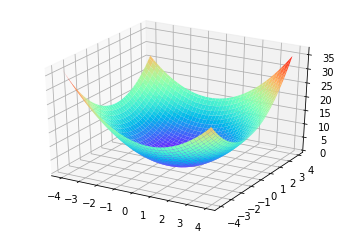

In [3]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(x, y)
z = x**2 + 0.3 * x * y + y**2
ax.plot_surface(x, y, z, cmap=cm.rainbow)

# LAB

코스트 함수를 직접, 텐서플로에서 구현

In [4]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  c = 0
  for i in range(len(X)):
    c += (W * X[i] - Y[i]) ** 2
  return c / len(X)

for feed_W in np.linspace(-3, 5, 15):
  curr_cost = cost_func(feed_W, X, Y)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


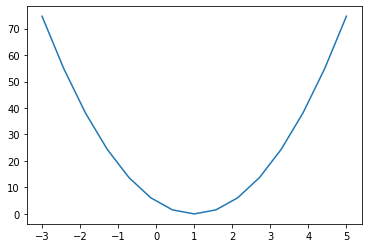

In [6]:
import tensorflow as tf
def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, 15)
cost_values = []

for feed_W in W_values:
  curr_cost = cost_func(feed_W, X, Y)
  cost_values.append(curr_cost)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

plt.plot(W_values, cost_values)

## Gradient descent

In [23]:
X = np.array([1., 2., 3.], dtype=np.float32)
Y = np.array([1., 2., 3.], dtype=np.float32)
W = tf.Variable(3.)

alpha = 0.01

for step in range(200+1):
  gradient = tf.reduce_mean((W * X - Y) * X)
  descent = W - gradient * alpha
  W.assign(descent)
  if step % 10 == 0:
    print(step, W.numpy())

0 2.9066668
10 2.182286
20 1.7331121
30 1.4545883
40 1.2818812
50 1.1747888
60 1.1083832
70 1.0672063
80 1.0416734
90 1.0258409
100 1.0160232
110 1.0099355
120 1.0061606
130 1.0038201
140 1.0023687
150 1.0014688
160 1.0009108
170 1.0005647
180 1.00035
190 1.000217
200 1.0001345


In [25]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal([1], -100., 100.))

for step in range(300+1):
  hypothesis = W * X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))

  alpha = 0.01
  gradient = tf.reduce_mean((W * X - Y) * X)
  descent = W - alpha * gradient
  W.assign(descent)

  if step % 10 == 0:
    print("{:5} | {:10.4f} | {:10.6f}".format(
        step, cost.numpy(), W.numpy()[0]
    ))

    0 | 34194.3750 | -80.605370
   10 | 13147.7139 | -49.601868
   20 |  5055.2891 | -30.377214
   30 |  1943.7555 | -18.456388
   40 |   747.3727 | -11.064519
   50 |   287.3643 |  -6.480967
   60 |   110.4913 |  -3.638798
   70 |    42.4838 |  -1.876427
   80 |    16.3350 |  -0.783615
   90 |     6.2808 |  -0.105984
  100 |     2.4150 |   0.314201
  110 |     0.9286 |   0.574750
  120 |     0.3570 |   0.736311
  130 |     0.1373 |   0.836492
  140 |     0.0528 |   0.898612
  150 |     0.0203 |   0.937131
  160 |     0.0078 |   0.961016
  170 |     0.0030 |   0.975827
  180 |     0.0012 |   0.985011
  190 |     0.0004 |   0.990706
  200 |     0.0002 |   0.994237
  210 |     0.0001 |   0.996426
  220 |     0.0000 |   0.997784
  230 |     0.0000 |   0.998626
  240 |     0.0000 |   0.999148
  250 |     0.0000 |   0.999472
  260 |     0.0000 |   0.999672
  270 |     0.0000 |   0.999797
  280 |     0.0000 |   0.999874
  290 |     0.0000 |   0.999922
  300 |     0.0000 |   0.999952


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 1.0617
Epoch 2/100
1/1 [==============================] - 0s 991us/step - loss: 0.7977
Epoch 3/100
1/1 [==============================] - 0s 999us/step - loss: 0.6141
Epoch 4/100
1/1 [==============================] - 0s 926us/step - loss: 0.4864
Epoch 5/100
1/1 [==============================] - 0s 971us/step - loss: 0.3974
Epoch 6/100
1/1 [==============================] - 0s 954us/step - loss: 0.3353
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 8/100
1/1 [==============================] - 0s 940us/step - loss: 0.2614
Epoch 9/100
1/1 [=

Text(0.5, 0, 'epoch')

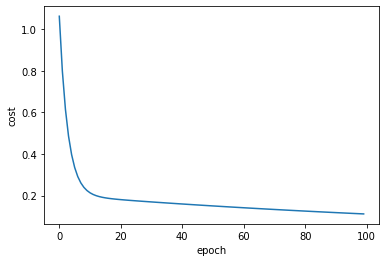

In [30]:
# Keras Version

import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

model = keras.Sequential()
model.add(keras.layers.Dense(1, input_dim=1))

sgd = keras.optimizers.SGD()
model.compile(loss='mse', optimizer=sgd)

model.summary()

history = model.fit(x_train, y_train, epochs=100)

y_predict = model.predict([5, 4])
print(y_predict)

plt.plot(history.history['loss'])
plt.ylabel('cost')
plt.xlabel('epoch')